In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2023-01-15 23:06:58.903877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-15 23:06:58.903912: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-15 23:07:01.114034: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-15 23:07:01.114315: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-15 23:07:01.114342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
train_dir = '/home/hasnain/Downloads/train/'
val_dir = '/home/hasnain/Downloads/validation/'
test_dir = '/home/hasnain/Downloads/test/'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# it also involves to decode jpeg into RGB pixels

In [9]:
# Generating the batches for tensor image
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             batch_size=20,
                                             class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

2023-01-15 23:27:55.652454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-15 23:27:55.652539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hasnain-Latitude-E6420): /proc/driver/nvidia/version does not exist


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
history = model.fit_generator(
      train_gen,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

/tmp/ipykernel_20670/3642627977.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20


2023-01-15 23:31:17.736391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.
2023-01-15 23:31:18.822223: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.


  1/100 [..............................] - ETA: 4:52 - loss: 0.6925 - acc: 0.5000

2023-01-15 23:31:19.073202: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.


  2/100 [..............................] - ETA: 2:02 - loss: 1.9941 - acc: 0.4500

2023-01-15 23:31:20.128799: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.
2023-01-15 23:31:20.318508: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.


100/100 [==============================] - 132s 1s/step - loss: 0.7299 - acc: 0.4945 - val_loss: 0.6926 - val_acc: 0.5990
Epoch 2/20
100/100 [==============================] - 130s 1s/step - loss: 0.6966 - acc: 0.5105 - val_loss: 0.6917 - val_acc: 0.5620
Epoch 3/20
100/100 [==============================] - 126s 1s/step - loss: 0.6898 - acc: 0.5540 - val_loss: 0.7122 - val_acc: 0.5040
Epoch 4/20
100/100 [==============================] - 126s 1s/step - loss: 0.6727 - acc: 0.5955 - val_loss: 0.6185 - val_acc: 0.6490
Epoch 5/20
100/100 [==============================] - 125s 1s/step - loss: 0.6118 - acc: 0.6765 - val_loss: 0.6135 - val_acc: 0.6670
Epoch 6/20
100/100 [==============================] - 126s 1s/step - loss: 0.5700 - acc: 0.7075 - val_loss: 0.5788 - val_acc: 0.7070
Epoch 7/20
100/100 [==============================] - 125s 1s/step - loss: 0.5182 - acc: 0.7450 - val_loss: 0.5639 - val_acc: 0.7060
Epoch 8/20
100/100 [==============================] - 125s 1s/step - loss: 0.464

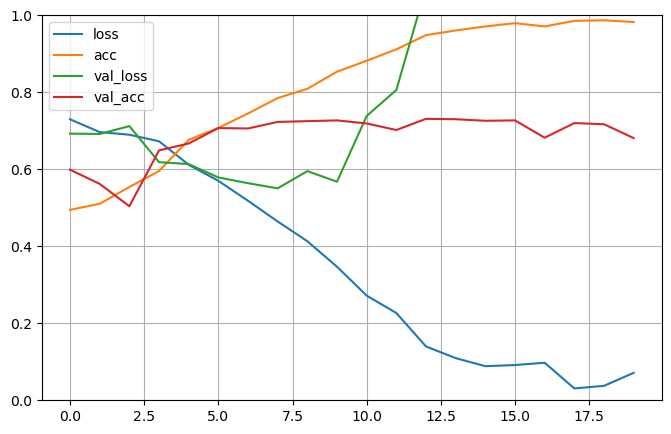

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
#clear sign of overfitting since. See the graph of val acc and acc

In [19]:
model.save("model.h5")

In [20]:
del model

In [21]:
keras.backend.clear_session()

### Using the transfer learning rate from VGG16

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import VGG16

con_base = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (150,150,3))

2023-01-16 10:29:30.497632: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-16 10:29:30.497702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hasnain-Latitude-E6420): /proc/driver/nvidia/version does not exist


58889256/58889256 [==============================] - 80s 1us/step


In [6]:
con_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
con_base.trainable = False

In [14]:
from tensorflow import keras

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(con_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

/tmp/ipykernel_25726/1837521693.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


2023-01-16 10:36:04.765783: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 115200000 exceeds 10% of free system memory.
2023-01-16 10:36:04.920129: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 115200000 exceeds 10% of free system memory.
2023-01-16 10:36:05.726206: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 28800000 exceeds 10% of free system memory.
2023-01-16 10:36:05.749981: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 57600000 exceeds 10% of free system memory.
2023-01-16 10:36:06.096766: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 57600000 exceeds 10% of free system memory.


  5/100 [>.............................] - ETA: 8:53 - loss: 3.3768 - acc: 0.5400

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)